In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary
from model import Net
from utils import load_data, visualize_sample_data,train, test, plot_performance_curves

In [ ]:
# Check if CUDA is available
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# Set the device to CUDA (GPU) if available, otherwise set it to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


CUDA Available? True


In [ ]:
# Load and Preprocess data
train_data, test_data = load_data()

# Define train and test data loaders - to feed data(images) in batches to model
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)#####
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

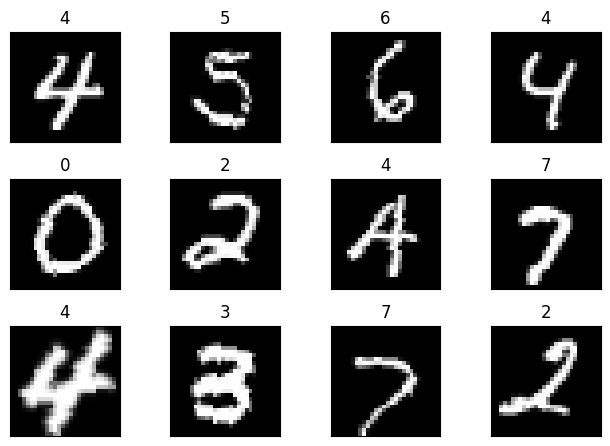

In [ ]:
# visualize sample data
visualize_sample_data(train_loader)

CODE BLOCK: 8

In [ ]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 10

In [ ]:
# Instantiate the neural network model and move it to the specified device
model = Net().to(device)  

# Set up the SGD optimizer with learning rate 0.01 and momentum 0.9
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9) 

# Set up a learning rate scheduler to adjust the learning rate during training
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True) 

# Define the loss function (CrossEntropyLoss for classification tasks)
criterion = nn.CrossEntropyLoss()  

# Set the number of epochs for training
num_epochs = 20  

# Loop over the specified number of epochs
for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')  
     # Train the model 
    epoch_train_performance = train(model, device, train_loader, optimizer, criterion) 
    # Evaluate the model on the test set
    epoch_test_performance = test(model, device, test_loader, criterion)  

    # Append the training and testing accuracy and loss for this epoch to the respective lists
    train_acc.append(epoch_train_performance[0])
    train_losses.append(epoch_train_performance[1])
    test_acc.append(epoch_test_performance[0])
    test_losses.append(epoch_test_performance[1])
    
    # Update the learning rate scheduler for the next epoch
    scheduler.step()  


Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.8725 Batch_id=117 Accuracy=33.24: 100%|██████████| 118/118 [00:20<00:00,  5.87it/s]


Test set: Average loss: 0.9929, Accuracy: 6718/10000 (67.18%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1594 Batch_id=117 Accuracy=87.35: 100%|██████████| 118/118 [00:19<00:00,  5.91it/s]


Test set: Average loss: 0.1428, Accuracy: 9568/10000 (95.68%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1636 Batch_id=117 Accuracy=95.55: 100%|██████████| 118/118 [00:20<00:00,  5.68it/s]


Test set: Average loss: 0.0703, Accuracy: 9802/10000 (98.02%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0861 Batch_id=117 Accuracy=96.68: 100%|██████████| 118/118 [00:21<00:00,  5.43it/s]


Test set: Average loss: 0.0513, Accuracy: 9838/10000 (98.38%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0715 Batch_id=117 Accuracy=97.22: 100%|██████████| 118/118 [00:20<00:00,  5.71it/s]


Test set: Average loss: 0.0467, Accuracy: 9856/10000 (98.56%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0747 Batch_id=117 Accuracy=97.56: 100%|██████████| 118/118 [00:19<00:00,  5.91it/s]


Test set: Average loss: 0.0412, Accuracy: 9877/10000 (98.77%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0546 Batch_id=117 Accuracy=97.88: 100%|██████████| 118/118 [00:20<00:00,  5.87it/s]


Test set: Average loss: 0.0363, Accuracy: 9883/10000 (98.83%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0716 Batch_id=117 Accuracy=98.15: 100%|██████████| 118/118 [00:20<00:00,  5.62it/s]


Test set: Average loss: 0.0329, Accuracy: 9895/10000 (98.95%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0610 Batch_id=117 Accuracy=98.34: 100%|██████████| 118/118 [00:21<00:00,  5.46it/s]


Test set: Average loss: 0.0275, Accuracy: 9911/10000 (99.11%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0272 Batch_id=117 Accuracy=98.36: 100%|██████████| 118/118 [00:20<00:00,  5.69it/s]


Test set: Average loss: 0.0294, Accuracy: 9904/10000 (99.04%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0229 Batch_id=117 Accuracy=98.49: 100%|██████████| 118/118 [00:20<00:00,  5.77it/s]


Test set: Average loss: 0.0286, Accuracy: 9906/10000 (99.06%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0368 Batch_id=117 Accuracy=98.63: 100%|██████████| 118/118 [00:20<00:00,  5.84it/s]


Test set: Average loss: 0.0263, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0399 Batch_id=117 Accuracy=98.72: 100%|██████████| 118/118 [00:21<00:00,  5.56it/s]


Test set: Average loss: 0.0265, Accuracy: 9906/10000 (99.06%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0608 Batch_id=117 Accuracy=98.73: 100%|██████████| 118/118 [00:21<00:00,  5.55it/s]


Test set: Average loss: 0.0257, Accuracy: 9916/10000 (99.16%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0183 Batch_id=117 Accuracy=98.80: 100%|██████████| 118/118 [00:21<00:00,  5.40it/s]


Test set: Average loss: 0.0302, Accuracy: 9903/10000 (99.03%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0905 Batch_id=117 Accuracy=98.99: 100%|██████████| 118/118 [00:21<00:00,  5.62it/s]


Test set: Average loss: 0.0203, Accuracy: 9926/10000 (99.26%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0464 Batch_id=117 Accuracy=99.15: 100%|██████████| 118/118 [00:20<00:00,  5.82it/s]


Test set: Average loss: 0.0200, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0135 Batch_id=117 Accuracy=99.02: 100%|██████████| 118/118 [00:20<00:00,  5.79it/s]


Test set: Average loss: 0.0193, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0223 Batch_id=117 Accuracy=99.06: 100%|██████████| 118/118 [00:21<00:00,  5.58it/s]


Test set: Average loss: 0.0195, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0057 Batch_id=117 Accuracy=99.12: 100%|██████████| 118/118 [00:21<00:00,  5.52it/s]


Test set: Average loss: 0.0200, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-03.


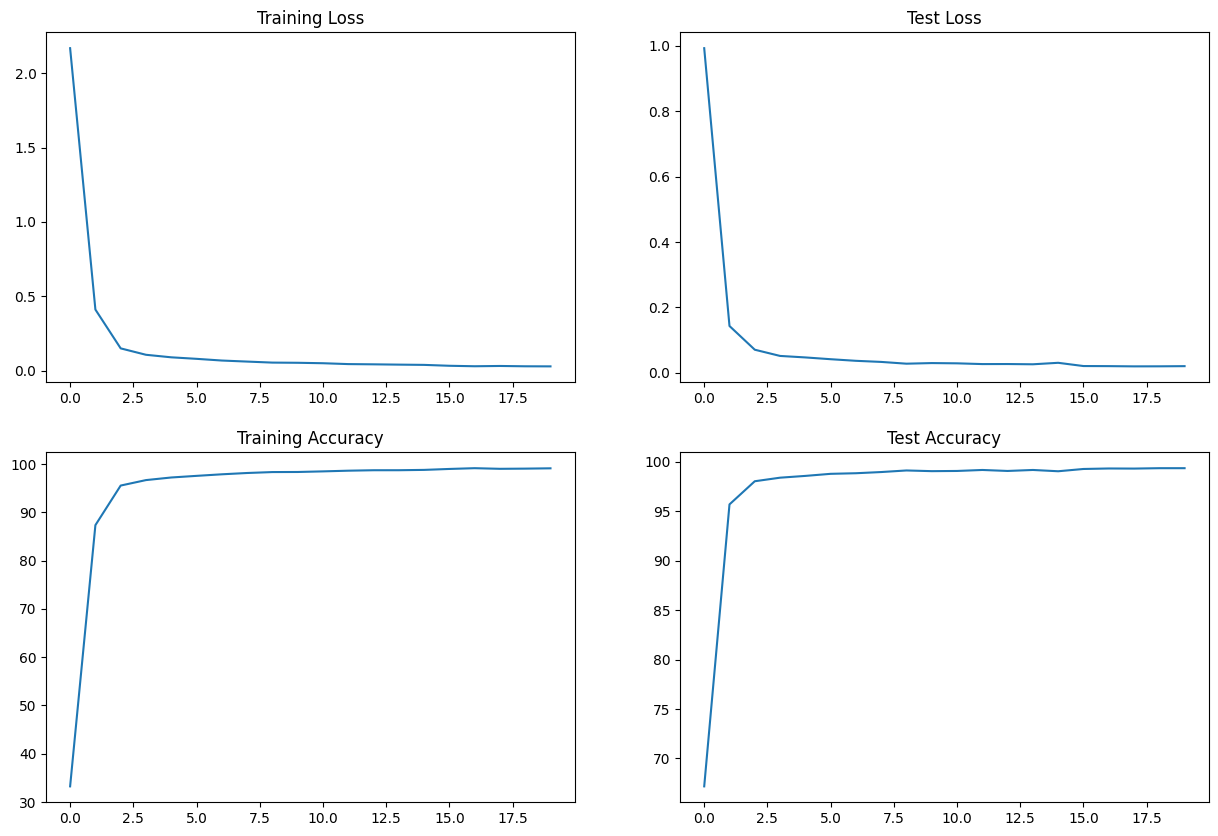

In [ ]:
# Plot Training and Testing Accuracy and losses curve with number of epochs
plot_performance_curves(train_acc,train_losses,test_acc,test_losses)


In [ ]:
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
           Flatten-5                 [-1, 4096]               0
            Linear-6                   [-1, 50]         204,800
            Linear-7                   [-1, 10]             500
Total params: 592,660
Trainable params: 592,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.70
Params size (MB): 2.26
Estimated Total Size (MB): 2.96
----------------------------------------------------------------
